In [1]:
%matplotlib inline
#from typing import Dict, Tuple, List, Union, Iterable

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#from matplotlib.ticker import AutoMinorLocator
plt.style.use("lm")
import numpy as np
#import scipy.linalg as sl #expm
#import os
#import time
#import random
#import string
#import copy
#from tabulate import tabulate
import samplebase as sb

import path_utils as putils

In [2]:
from decimal import Decimal

def fexp(number):
    (sign, digits, exponent) = Decimal(number).as_tuple()
    return len(digits) + exponent - 1

def fman(number):
    return Decimal(number).scaleb(-fexp(number)).normalize()

def to_latex_value_with_err(value, err, n_round=1, include_math_env=False):
    assert abs(value) > abs(err)
    val_exp = fexp(value)
    err_2 = err / (10**val_exp)
    n_round = max(-1*fexp(err_2),n_round)
    err_man = round(err_2, n_round)
    val_man = round(fman(value), n_round)
    val_str = ("{:0." + str(n_round) + "f}").format(val_man)
    err_str = ("{:0." + str(n_round) + "f}").format(err_man)
    if val_exp==0:
        result = val_str + " \pm " + err_str
    else:
        result = r"( " + val_str + " \pm " + err_str + r")\times 10^" + "{" + str(val_exp) +"}"
    if include_math_env:
        result = r"$ " + result + r" $"
    return result

def to_latex_value(value, n_round=1, include_math_env=False):
    val_exp = fexp(value)
    val_man = round(fman(value), n_round)
    val_str = ("{:0." + str(n_round) + "f}").format(val_man)
    if val_exp==0:
        result = val_str
    else:
        result = val_str + r"\times 10^" + "{" + str(val_exp) +"} "
    
    if include_math_env:
        result = r"$ " + result + r" $"
    return result

print(to_latex_value_with_err(1e-3, 0.5e-6))
print(to_latex_value(4e-3))
print(to_latex_value_with_err(1e-3, 0.5e-6, include_math_env=True))
print(to_latex_value(4e-3, include_math_env=True))
print(to_latex_value(1.3))
print(to_latex_value_with_err(1.2, 1.1))

( 1.0000 \pm 0.0005)\times 10^{-3}
4.0\times 10^{-3} 
$ ( 1.0000 \pm 0.0005)\times 10^{-3} $
$ 4.0\times 10^{-3}  $
1.3
1.2 \pm 1.1


In [3]:
def cluster_along_arg(samples, arg_key, arg_values):
    """
    Transform list of samples into a dictionary that maps 
    from arg_value (described by arg_key) to the clustered 
    samples list.
    """
    clustered_samples = dict()
    for arg_value in arg_values:
        clustered_samples[arg_value] = []
    
    for sample in samples:
        for arg_value in arg_values:
            if sample.args[arg_key] == arg_value:
                clustered_samples[arg_value].append(sample)
    
    return clustered_samples

In [4]:
def plot_overview(plot_functions, n_rows=1, n_cols=3, size_factor=1.):
    plt.figure(1, figsize=(5*n_cols*size_factor,3.6*n_rows*size_factor))
    n_plots = n_rows * n_cols
    idx = 1
    for pf in plot_functions:
        if idx > n_plots:
            break
        plt.subplot(n_rows, n_cols, idx)
        #plt.xscale("log")
        #secondrow = (idx in [7,8,9,10,11,12]) or (idx in [19,20,21,22,23,24]) or (idx in [31,32,33,34,35,36])
        #if secondrow:
        #    plt.gca().set_axis_bgcolor('#ededed')
        pf()
        idx += 1

    plt.subplots_adjust(top=0.96, bottom=0.04, left=0.07, right=0.97, hspace=0.4, wspace=0.35)
    #plt.tight_layout(pad=0.6, w_pad=2.0, h_pad=2.0)

In [5]:
data_dir = putils.data_dir(12)
data_dir

'/srv/public/workspace/data/rlearn-12'

In [6]:
all_samples = sb.list_of_samples(data_dir)
n_done = sum([1 for s in all_samples if s.done])
n_total = len(all_samples)
print(n_done, "/", n_total)

200 / 200


In [7]:
alphas = set()
timesteps = set()
noises = set()
folds = set()
gillespie_realisations = set()
for s in all_samples:
    if s.done:
        alphas.add(s.args["alpha"])
        timesteps.add(s.args["dt"])
        noises.add(s.args["noise"])
        folds.add(s.args["n_splits"])
        gillespie_realisations.add(s.args["gillespie_realisations"])
alphas = np.fromiter(alphas, dtype=float)
alphas.sort()
timesteps = np.fromiter(timesteps, dtype=float)
timesteps.sort()
noises = np.fromiter(noises, dtype=float)
noises.sort()
folds = np.fromiter(folds, dtype=int)
folds.sort()
gillespie_realisations = np.fromiter(gillespie_realisations, dtype=int)
gillespie_realisations.sort()
print(alphas)
print(timesteps)
print(noises)
print(folds)
print(gillespie_realisations)

[1.00000000e-09 1.38949549e-09 1.93069773e-09 2.68269580e-09
 3.72759372e-09 5.17947468e-09 7.19685673e-09 1.00000000e-08
 1.38949549e-08 1.93069773e-08 2.68269580e-08 3.72759372e-08
 5.17947468e-08 7.19685673e-08 1.00000000e-07 1.38949549e-07
 1.93069773e-07 2.68269580e-07 3.72759372e-07 5.17947468e-07
 7.19685673e-07 1.00000000e-06 1.38949549e-06 1.93069773e-06
 2.68269580e-06 3.72759372e-06 5.17947468e-06 7.19685673e-06
 1.00000000e-05 1.38949549e-05 1.93069773e-05 2.68269580e-05
 3.72759372e-05 5.17947468e-05 7.19685673e-05 1.00000000e-04
 1.38949549e-04 1.93069773e-04 2.68269580e-04 3.72759372e-04
 5.17947468e-04 7.19685673e-04 1.00000000e-03 1.38949549e-03
 1.93069773e-03 2.68269580e-03 3.72759372e-03 5.17947468e-03
 7.19685673e-03 1.00000000e-02]
[0.00225]
[0.]
[15]
[  1  10 100 500]


In [8]:
samples = cluster_along_arg(all_samples, "gillespie_realisations", gillespie_realisations)

In [9]:
def plot_validation(sample_list, mean=True):
    sorted_samples = sorted(sample_list, key=lambda x: x.args["alpha"])
    scores = np.array([ np.array(s.result["cv_result"][0]["score"]) for s in sorted_samples])
    #print(scores)
    min_indices = np.argmin(-scores)
    alphas = np.array([ s.args["alpha"] for s in sorted_samples])
    n_folds = len(scores[0])
    if mean:
        exclude_first = scores[:, 1:]
        mean_scores = np.mean(exclude_first, axis=1)
        err_scores = np.std(exclude_first, axis=1) / np.sqrt(n_folds-1 if n_folds>2 else 1)
        plt.errorbar(alphas, - mean_scores, yerr=err_scores)
        print("best mean score for alpha={}".format(alphas[np.argmin(-mean_scores)]))
    else:
        for i in range(1, n_folds):
            if i < 7:
                plt.plot(alphas, - scores[:,i], label=str(i))
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("score")
    
def plot_trajs(sample_list, mean=True):
    sorted_samples = sorted(sample_list, key=lambda x: x.args["alpha"])
    traj_counts = [ s.result["counts"] for s in sorted_samples ]
    for counts in traj_counts[1:2]:
        plt.plot(counts, alpha=1.0)

best mean score for alpha=3.727593720314938e-06


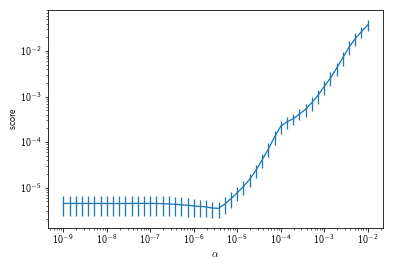

best mean score for alpha=3.727593720314938e-06


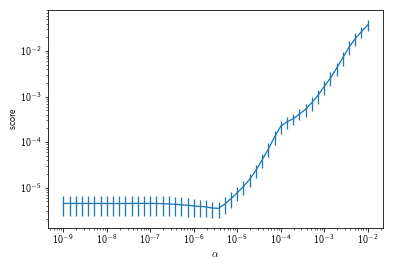

best mean score for alpha=3.727593720314938e-06


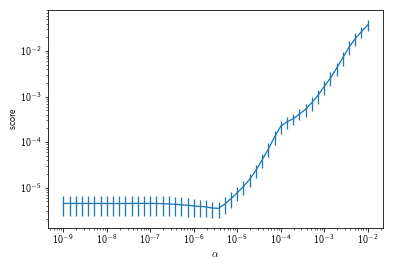

best mean score for alpha=3.727593720314938e-06


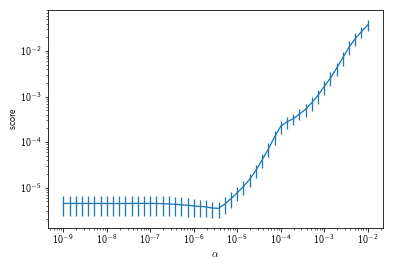

In [10]:
samples_1 = samples[1]
plot_validation(samples_1)
plt.show()
samples_10 = samples[10]
plot_validation(samples_10)
plt.show()
samples_100 = samples[100]
plot_validation(samples_100)
plt.show()
samples_500 = samples[500]
plot_validation(samples_500)
plt.show()

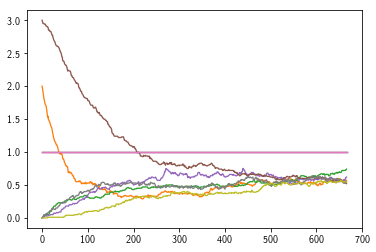

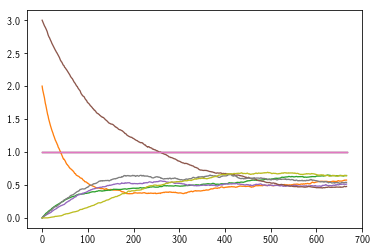

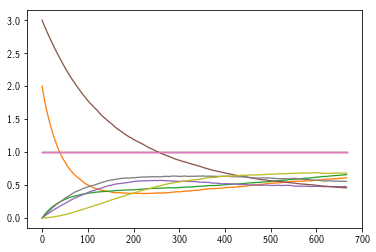

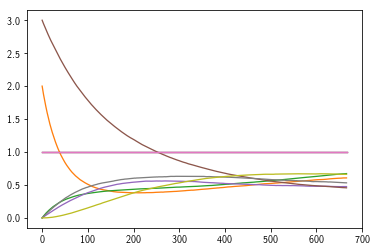

In [11]:
samples_1 = samples[1]
plot_trajs(samples_1)
plt.show()
samples_10 = samples[10]
plot_trajs(samples_10)
plt.show()
samples_100 = samples[100]
plot_trajs(samples_100)
plt.show()
samples_500 = samples[500]
plot_trajs(samples_500)
plt.show()

In [6]:
import run_sample as rs

/srv/public/miniconda3/envs/rlearn/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
regulation_network, analysis = rs.get_regulation_network(4.5e-3, 0.0, 1.5, gillespie_realisations=1000, scale=100.)

obtaining regulation network with dt = 0.0045
scaling population up, timestep down and bimol. rates down by factor 100.0
generating data using gillespie kmc averaged over 1000 realisations


HBox(children=(HBox(children=(Label(value='generate averaged kmc 0'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [10]:
from sklearn.model_selection import KFold
def get_testset(n_splits, n, n_frames):
    kf = KFold(n_splits)
    ix = 0
    testset = None
    for train,test in kf.split(np.arange(n_frames)):
        if ix == n:
            testset = test
            break
        ix += 1
    assert testset is not None
    return testset

# $t_\mathrm{target}=1.5$

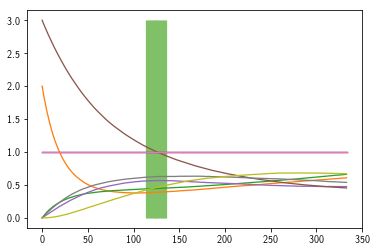

In [15]:
plt.plot(analysis.trajs[0].counts)
plt.vlines(get_testset(15, 5, len(analysis.trajs[0].counts)), 0, 3, colors=plt.get_cmap("summer")(0.5))

In [ ]:
analysis.plot_derivatives(0)

#### LSQ

optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
410 / 30000 iterations


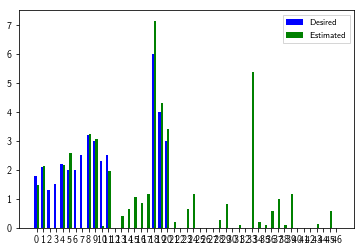

In [16]:
result = analysis.solve(0, 0., 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

#### Regularized with $\alpha=3\times 10^{6}$

optimization problem did exit successfully (alpha=3e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
417 / 30000 iterations


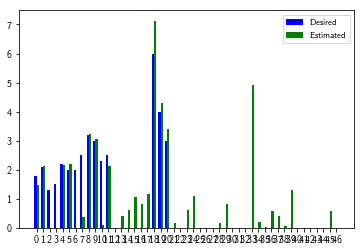

In [17]:
result = analysis.solve(0, 3e-6, 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

# $t_\mathrm{target}=3$

In [7]:
regulation_network, analysis = rs.get_regulation_network(4.5e-3, 0.0, 3.0, gillespie_realisations=1000, scale=100.)

obtaining regulation network with dt = 0.0045
scaling population up, timestep down and bimol. rates down by factor 100.0
generating data using gillespie kmc averaged over 1000 realisations


HBox(children=(HBox(children=(Label(value='generate averaged kmc 0'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

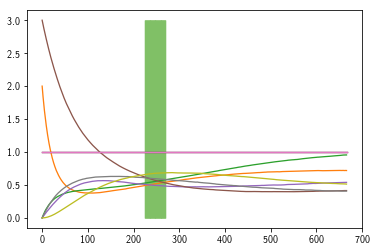

In [19]:
plt.plot(analysis.trajs[0].counts)
plt.vlines(get_testset(15, 5, len(analysis.trajs[0].counts)), 0, 3, colors=plt.get_cmap("summer")(0.5))

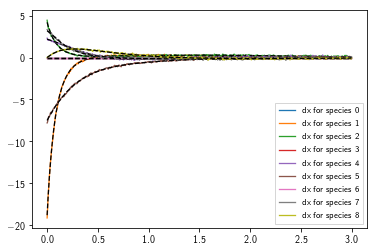

In [20]:
analysis.plot_derivatives(0)

#### LSQ

optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
385 / 30000 iterations


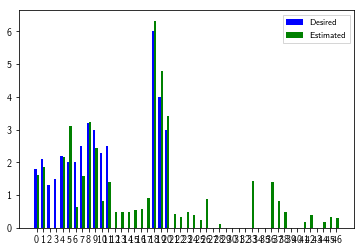

In [21]:
result = analysis.solve(0, 0., 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

#### Regularized with $\alpha=3\times 10^{6}$

optimization problem did exit successfully (alpha=3e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
391 / 30000 iterations


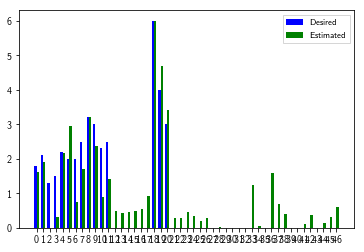

In [22]:
result = analysis.solve(0, 3e-06, 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

# try more realisations

In [23]:
regulation_network, analysis = rs.get_regulation_network(4.5e-3, 0.0, 3.0, gillespie_realisations=10000, scale=100.)

obtaining regulation network with dt = 0.0045
scaling population up, timestep down and bimol. rates down by factor 100.0
generating data using gillespie kmc averaged over 10000 realisations


HBox(children=(HBox(children=(Label(value='generate averaged kmc 0'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=10000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

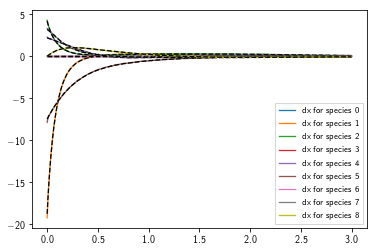

In [24]:
analysis.plot_derivatives(0)

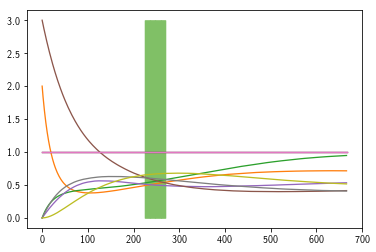

In [25]:
plt.plot(analysis.trajs[0].counts)
plt.vlines(get_testset(15, 5, len(analysis.trajs[0].counts)), 0, 3, colors=plt.get_cmap("summer")(0.5))

#### LSQ

optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
405 / 30000 iterations


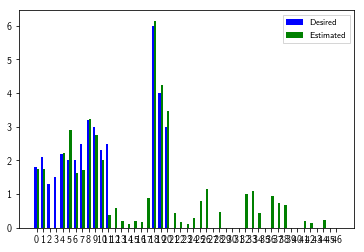

In [26]:
result = analysis.solve(0, 0., 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

#### Regularized with $\alpha=3\times 10^{6}$

optimization problem did exit successfully (alpha=3e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
388 / 30000 iterations


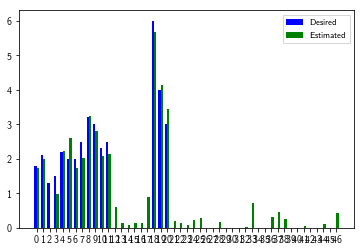

In [27]:
result = analysis.solve(0, 3e-06, 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

# compare again with lma / zero noise

In [28]:
regulation_network, analysis = rs.get_regulation_network(4.5e-3, 0.0, 3.0, gillespie_realisations=None, scale=1.)

obtaining regulation network with dt = 0.0045
generating data by integrating the law of mass action with additive noise 0.0


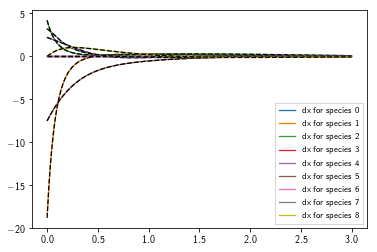

In [29]:
analysis.plot_derivatives(0)

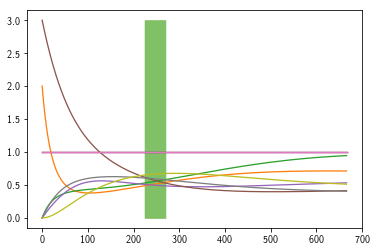

In [30]:
plt.plot(analysis.trajs[0].counts)
plt.vlines(get_testset(15, 5, len(analysis.trajs[0].counts)), 0, 3, colors=plt.get_cmap("summer")(0.5))

#### LSQ

optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
422 / 30000 iterations


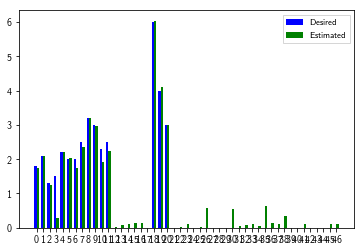

In [31]:
result = analysis.solve(0, 0., 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

#### Regularized with $\alpha=3\times 10^{-6}$

optimization problem did exit successfully (alpha=3e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
398 / 30000 iterations


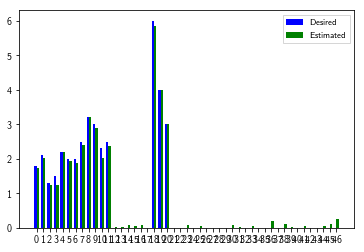

In [32]:
result = analysis.solve(0, 3e-06, 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

# try even more realisations

In [33]:
regulation_network, analysis = rs.get_regulation_network(4.5e-3, 0.0, 3.0, gillespie_realisations=100000, scale=100.)

obtaining regulation network with dt = 0.0045
scaling population up, timestep down and bimol. rates down by factor 100.0
generating data using gillespie kmc averaged over 100000 realisations


HBox(children=(HBox(children=(Label(value='generate averaged kmc 0'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=100000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

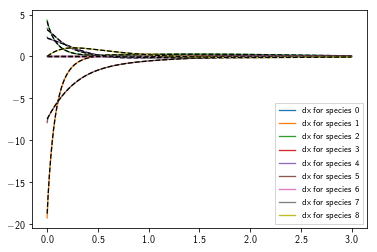

In [34]:
analysis.plot_derivatives(0)

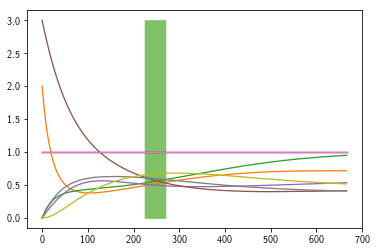

In [35]:
plt.plot(analysis.trajs[0].counts)
plt.vlines(get_testset(15, 5, len(analysis.trajs[0].counts)), 0, 3, colors=plt.get_cmap("summer")(0.5))

#### LSQ

optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
389 / 30000 iterations


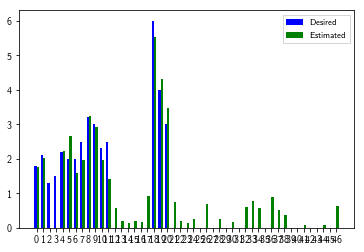

In [36]:
result = analysis.solve(0, 0., 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

#### Regularized with $\alpha=3\times 10^{6}$

optimization problem did exit successfully (alpha=3e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
395 / 30000 iterations


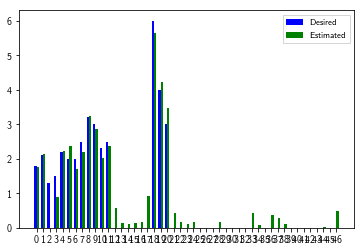

In [37]:
result = analysis.solve(0, 3e-06, 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

## Interpolate counts as well, 1000 gillespie realisations

In [7]:
regulation_network, analysis = rs.get_regulation_network(4.5e-3, 0.0, 3.0, gillespie_realisations=1000, scale=100.)

obtaining regulation network with dt = 0.0045
scaling population up, timestep down and bimol. rates down by factor 100.0
generating data using gillespie kmc averaged over 1000 realisations


HBox(children=(HBox(children=(Label(value='generate averaged kmc 0'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [8]:
regulation_network.interpolate_counts(analysis, persist=False)

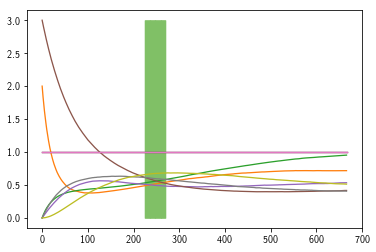

In [11]:
plt.plot(analysis.trajs[0].counts)
plt.vlines(get_testset(15, 5, len(analysis.trajs[0].counts)), 0, 3, colors=plt.get_cmap("summer")(0.5))

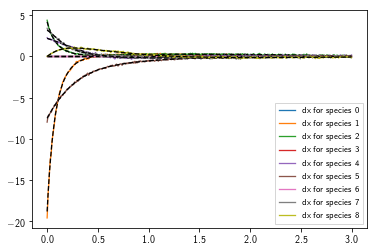

In [12]:
analysis.plot_derivatives(0)

#### LSQ

optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
358 / 30000 iterations


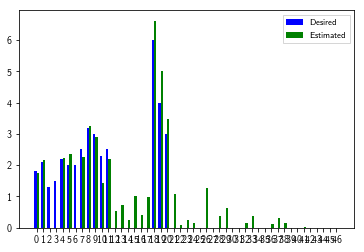

In [13]:
result = analysis.solve(0, 0., 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)

#### Regularized with $\alpha=3\times 10^{6}$

optimization problem did exit successfully (alpha=3e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
354 / 30000 iterations


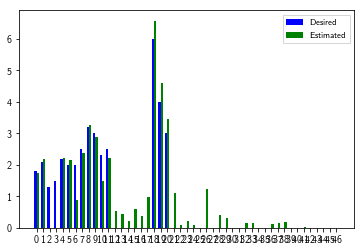

In [14]:
result = analysis.solve(0, 3e-06, 1., tol=1e-16, recompute=True, persist=False, concatenated=True)
analysis.plot_rates_bar(regulation_network.desired_rates, result)